# 2.1 Поиск ключевых слов/n-грамм. Векторизация текстов

Для начало мы импортируем библеотеку, а так же выгрузить датасет

In [1]:
import pandas as pd


In [2]:
datesets = pd.read_csv('C:/Users/ClassUser/Documents/fkasfd;lasg/pain2.csv', index_col=0)

так же нам надо удалить не нужные нам столбцы, чтоб нам было проще работать

In [3]:
datesets = datesets.drop(columns=["rating", "company_branches", "rate", "date"])

Дальше нам нужны будут три модели для того чтоб найти ключевых слов/n-грамм. Векторизация текстов<br>
Для начало я взял в переменую столбцы с которыми буду работать <br>
я выбрал эти модели так как они самые быстрыею

CountVectorizer - Преобразуйте коллекцию текстовых документов в матрицу количества. выводит матрицу в целых числах, а так же весьма быстр <br> 

HashingVectorizer - Преобразуйте коллекцию текстовых документов в матрицу вхождений токенов. но при этом эта реализация векторизатора текста использует хитрость хэширования, чтобы найти имя строки токена для отображения целочисленного индекса.
так же у неё есть он быстрый в плане скорости и обработки <br>

TfidfVectorizer - Преобразуйте коллекцию необработанных документов в матрицу функций TF-IDF. но он очень похож на CountVectorizer. 

так же для удобства я создал переменные с колонками которые буду использовать(description, Ready_words)

In [4]:
description = datesets["description"]

In [5]:
Ready_words = datesets["Ready_words"]

Так же я импортировал библеотеки которые нам будут нужны для нашей работы

# CountVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

Сначала мы инициализируем для того чтоб подсчитать сколько слов у нас повторяеться

In [7]:
vectorizer = CountVectorizer(ngram_range=(1, 3), max_df=0.9, min_df=0.1)

In [8]:
full_word = vectorizer.fit_transform(Ready_words)

In [9]:
vectorizer.get_feature_names_out()

array(['абсолютно', 'автоматизация', 'автоматизированный', ..., 'язык',
       'язык программирование', 'яндекс'], dtype=object)

потом мы выводим этот результат в виде DataFreme

In [10]:
pd.DataFrame(full_word.toarray(), columns=vectorizer.get_feature_names_out())

,абсолютно,автоматизация,автоматизированный,автоматизировать,автоматически,автоматический,автор,адрес,активно,активность,...,эффект,эффективно,эффективность,эффективный,являться,явно,ядро,язык,язык программирование,яндекс
0,2,0,0,0,0,0,0,0,2,0,...,2,0,0,0,4,0,0,5,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,2,1,1
2,0,0,0,0,0,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2,0,0,0,1,0,12,1,2,5,...,3,2,4,4,46,0,0,1,0,0
106,1,4,1,1,0,0,1,0,1,1,...,0,0,1,1,8,1,0,0,0,1
107,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,6,0,0,0,0,3
108,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


# HashingVectorizer

Так же я импортировал библеотеку которые нам будут нужна

In [11]:
from sklearn.feature_extraction.text import HashingVectorizer

Сначала мы инициализируем для того чтоб подсчитать сколько слов у нас повторяеться

In [12]:
vectorizer_hv = HashingVectorizer(ngram_range= (1, 3), n_features =1502)
vectorizer_hv_full_word = vectorizer_hv.fit_transform(Ready_words) 
vectorizer_hv_full_word
pd.DataFrame(vectorizer_hv_full_word.toarray(), columns= vectorizer.get_feature_names_out())

,абсолютно,автоматизация,автоматизированный,автоматизировать,автоматически,автоматический,автор,адрес,активно,активность,...,эффект,эффективно,эффективность,эффективный,являться,явно,ядро,язык,язык программирование,яндекс
0,0.000000,0.000000,0.009081,0.099893,0.000000,-0.009081,0.000000,0.009081,0.009081,0.018162,...,-0.009081,0.000000,0.009081,0.000000,0.000000,-0.009081,-0.018162,-0.018162,0.000000,0.018162
1,0.009711,0.000000,0.009711,-0.019423,-0.019423,0.000000,-0.019423,-0.029134,-0.019423,0.058269,...,0.000000,-0.019423,0.019423,0.009711,-0.009711,-0.009711,-0.029134,0.000000,-0.038846,0.000000
2,-0.011571,0.011571,0.011571,-0.034713,-0.011571,0.000000,-0.208277,0.011571,-0.011571,0.023142,...,0.000000,-0.023142,0.000000,0.000000,-0.011571,0.011571,-0.023142,0.000000,0.000000,0.000000
3,0.011501,0.000000,0.000000,-0.034503,-0.046004,0.023002,-0.034503,-0.023002,0.011501,-0.011501,...,-0.023002,-0.011501,0.000000,0.011501,0.000000,0.000000,0.000000,0.000000,0.000000,-0.011501
4,0.000000,-0.034581,0.017290,0.000000,-0.034581,0.000000,0.000000,0.034581,0.017290,0.000000,...,-0.051871,0.000000,0.000000,0.000000,0.000000,-0.017290,-0.017290,0.000000,-0.017290,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-0.012874,-0.012874,0.021456,-0.008583,-0.002146,0.010728,-0.021456,0.021456,-0.015019,0.030039,...,-0.002146,0.006437,-0.010728,0.004291,-0.004291,-0.004291,-0.036476,-0.006437,-0.015019,0.006437
106,-0.023190,-0.023190,-0.007730,-0.007730,-0.015460,0.007730,0.007730,-0.007730,0.000000,-0.007730,...,0.000000,0.000000,0.007730,0.007730,0.000000,-0.007730,0.015460,-0.007730,0.007730,-0.007730
107,0.000000,0.000000,0.071974,0.000000,-0.005536,0.011073,-0.044292,0.022146,0.000000,0.011073,...,-0.027682,-0.005536,-0.005536,-0.005536,0.011073,-0.005536,-0.027682,0.000000,-0.016609,0.016609
108,0.000000,0.009540,-0.009540,0.019080,0.000000,-0.009540,0.000000,0.028619,0.019080,-0.019080,...,-0.009540,-0.028619,0.009540,0.000000,0.009540,0.000000,-0.009540,0.000000,0.047699,-0.019080


# TfidfVectorizer

и последния библеотека

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

Сначала мы инициализируем для того чтоб подсчитать сколько слов у нас повторяеться

In [14]:
vectorizer_tv = TfidfVectorizer(ngram_range=(1, 3), max_df=0.9, min_df=0.1)
vectorizer_tv_full_word = vectorizer_tv.fit_transform(Ready_words)
vectorizer_tv.get_feature_names_out()
pd.DataFrame(vectorizer_tv_full_word.toarray(), columns=vectorizer_tv.get_feature_names_out())

,абсолютно,автоматизация,автоматизированный,автоматизировать,автоматически,автоматический,автор,адрес,активно,активность,...,эффект,эффективно,эффективность,эффективный,являться,явно,ядро,язык,язык программирование,яндекс
0,0.045896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037486,0.000000,...,0.040040,0.000000,0.000000,0.000000,0.052057,0.000000,0.0,0.072743,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018661,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020508,0.000000,0.025691,0.0,0.030321,0.024463,0.024463
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022244,0.000000,0.076494,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.021393,0.022722,0.021811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020618,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.040523,0.000000,0.000000,0.000000,0.032097,0.000000,0.000000,0.000000,0.033097,0.000000,...,0.000000,0.000000,0.035981,0.000000,0.022982,0.000000,0.0,0.308291,0.041455,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.009536,0.000000,0.000000,0.000000,0.003776,0.000000,0.044647,0.004159,0.007788,0.023839,...,0.012478,0.009138,0.016933,0.016355,0.124380,0.000000,0.0,0.003023,0.000000,0.000000
106,0.011499,0.042372,0.011251,0.010800,0.000000,0.000000,0.008973,0.000000,0.009391,0.011499,...,0.000000,0.000000,0.010210,0.009861,0.052169,0.012353,0.0,0.000000,0.000000,0.011763
107,0.012052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009843,0.000000,...,0.000000,0.000000,0.010701,0.000000,0.041010,0.000000,0.0,0.000000,0.000000,0.036987
108,0.023504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019197,0.000000,...,0.020505,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


Я решил что буд работать с датасетом в которой есть модель TfidfVectorizer, так как он оказался бысрее<br>
Дальше мы соеденяем vectorizer_tv_full_word с нашим основным датасетом (datesets)

In [15]:
gramm = pd.concat([datesets.reset_index(drop=True), 
pd.DataFrame(vectorizer_tv_full_word.toarray(), columns=vectorizer_tv.get_feature_names_out())], axis=1)

так же удалим не нужные нам уже колонки и оставим только те с которыми будет лучше работать

In [16]:
gramm = gramm.drop(columns=["description", "Ready_words"])

In [17]:
gramm

,абсолютно,автоматизация,автоматизированный,автоматизировать,автоматически,автоматический,автор,адрес,активно,активность,...,эффект,эффективно,эффективность,эффективный,являться,явно,ядро,язык,язык программирование,яндекс
0,0.045896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037486,0.000000,...,0.040040,0.000000,0.000000,0.000000,0.052057,0.000000,0.0,0.072743,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018661,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020508,0.000000,0.025691,0.0,0.030321,0.024463,0.024463
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022244,0.000000,0.076494,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.021393,0.022722,0.021811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020618,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.040523,0.000000,0.000000,0.000000,0.032097,0.000000,0.000000,0.000000,0.033097,0.000000,...,0.000000,0.000000,0.035981,0.000000,0.022982,0.000000,0.0,0.308291,0.041455,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.009536,0.000000,0.000000,0.000000,0.003776,0.000000,0.044647,0.004159,0.007788,0.023839,...,0.012478,0.009138,0.016933,0.016355,0.124380,0.000000,0.0,0.003023,0.000000,0.000000
106,0.011499,0.042372,0.011251,0.010800,0.000000,0.000000,0.008973,0.000000,0.009391,0.011499,...,0.000000,0.000000,0.010210,0.009861,0.052169,0.012353,0.0,0.000000,0.000000,0.011763
107,0.012052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009843,0.000000,...,0.000000,0.000000,0.010701,0.000000,0.041010,0.000000,0.0,0.000000,0.000000,0.036987
108,0.023504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019197,0.000000,...,0.020505,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


# 2.2 Тематическое моделирование

сначало мы импортируем ряд нужных нам библеотек так как:<br>
я их выбрал так как они быстрые и более точные 

LatentDirichletAllocation - Скрытое распределение Дирихле с помощью онлайнового вариационного алгоритма Байеса.<br>

TruncatedSVD - Уменьшение размерности с использованием усеченного SVD (он же LSA). В отличие от PCA, этот оценщик не центрирует данные перед вычислением разложения по сингулярным значениям. Это означает, что он может эффективно работать с разреженными матрицами.<br>

NMF  - Неотрицательная матричная факторизация (NMF).  Эта факторизация может быть использована, например, для уменьшения размерности, разделения источников или выделения темы.

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF


# NMF
мы указываем какую модель мы будем применять и сколько будет компанетов и указывем чтоб все данные он брал именно с нужного датасета(gramm)

In [19]:
nmf = NMF(n_components=3, random_state=1,).fit(gramm)

я решил сделать через функцию чтоб не писать каждый раз

In [20]:

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
)
no_top_words = 10
display_topics(nmf, vectorizer_tv.get_feature_names_out(), no_top_words)


Topic 0:
человек компания проект команда работа задача сотрудник год вопрос говорить
Topic 1:
приложение использовать данные устройство функция код сервер смартфон система значение
Topic 2:
тест команда задача тестирование тестировщик процесс автоматизация сервис разработка метрика


### LatentDirichletAllocation

дальше мы обучаем модели и проверяем какая ищз  моделей ближе по теме и смыслу, и самая лучшая LSA так как она ближе всех по теме

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification

In [22]:
lda = LatentDirichletAllocation(n_components=3, random_state=0).fit(gramm)

In [23]:
lsa = TruncatedSVD(n_components=3, random_state=1).fit(gramm)

In [24]:
display_topics(nmf, vectorizer_tv.get_feature_names_out(), no_top_words)

Topic 0:
человек компания проект команда работа задача сотрудник год вопрос говорить
Topic 1:
приложение использовать данные устройство функция код сервер смартфон система значение
Topic 2:
тест команда задача тестирование тестировщик процесс автоматизация сервис разработка метрика


In [25]:
display_topics(lda, vectorizer_tv.get_feature_names_out(), no_top_words)

Topic 0:
уделить интересно представитель посвятить свойство экономить частный факт мероприятие конференция
Topic 1:
команда проект задача приложение работа человек компания система использовать данные
Topic 2:
уделить интересно представитель посвятить свойство экономить частный факт мероприятие конференция


In [26]:
display_topics(lsa, vectorizer_tv.get_feature_names_out(), no_top_words)

Topic 0:
команда задача проект работа приложение человек компания система код процесс
Topic 1:
приложение значение функция устройство сборка использовать код сервер запрос смартфон
Topic 2:
тест команда задача тестирование тестировщик процесс автоматизация метрика монолит релиз


здесь можно посмотреть какая из моделей ближе по смыслу

In [27]:
lsa.transform(gramm)[0]

array([ 0.47000309,  0.18096785, -0.02501617])

In [28]:
lda.transform(gramm)[0]

array([0.02299249, 0.95401503, 0.02299249])

In [29]:
nmf.transform(gramm)[0]

array([0.05857193, 0.2916714 , 0.01570565])

# end

# 2.3 Кластеризация

K-Means<br>
BIRCH<br>
Bisecting K-Means<br>

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import BisectingKMeans

In [31]:
mms = MinMaxScaler().fit(gramm)
test = mms.fit_transform(gramm)
pca = PCA().fit(gramm)
test = pca.transform(gramm)

In [32]:
k_means_list = []
for Kmeans_class in range(1, 11):
        kmeans = KMeans(n_init="auto",  n_clusters = Kmeans_class).fit(gramm)
        k_means_list.append(kmeans.inertia_)


In [33]:
sns.set()

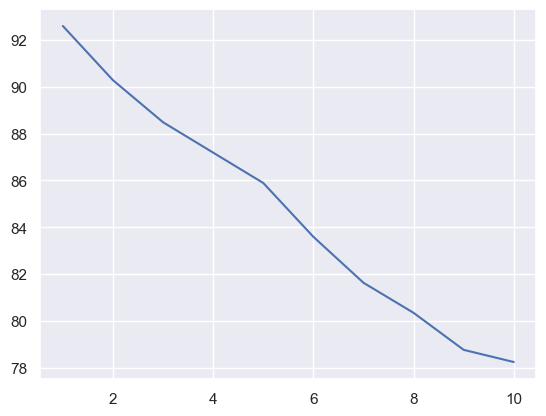

In [34]:
plt.plot(range(1, 11), k_means_list)

In [35]:
kmeans_gravik = KMeans(n_init='auto', n_clusters = 3).fit(gramm)
y_kmeans = kmeans_gravik.fit_predict(gramm)

<Axes: >

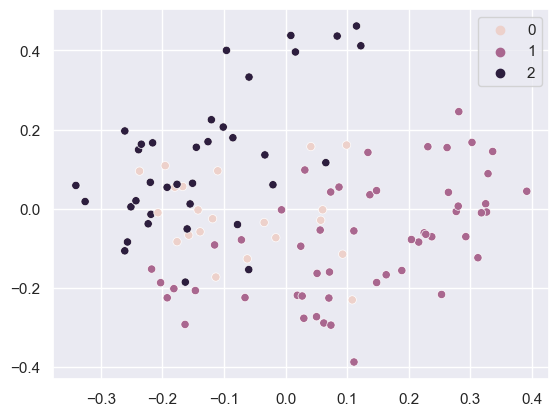

In [36]:
sns.scatterplot(data=gramm, x = test[:, 0], y = test[:, 1], hue=y_kmeans)

мы видим что здесь есть три кластера

In [37]:
from sklearn.cluster import Birch

In [38]:
birch_gravik = Birch(n_clusters = 3).fit(gramm)
y_birch = birch_gravik.fit_predict(gramm)

<Axes: >

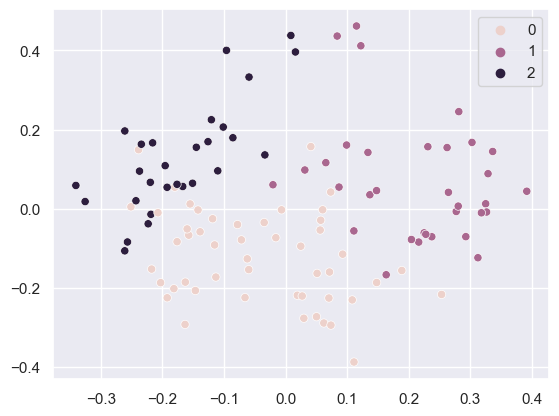

In [39]:
sns.scatterplot(x = test[:, 0], y = test[:, 1], hue=y_birch)

In [40]:
bisect_means = BisectingKMeans(n_clusters=3).fit(gramm)
y_bisect_means = bisect_means.labels_

<Axes: >

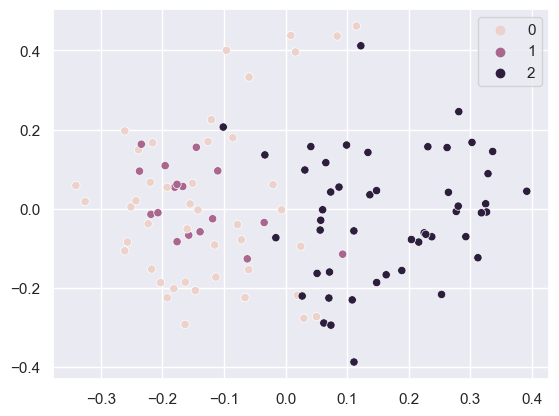

In [49]:
sns.scatterplot(x = test[:, 0], y = test[:, 1], hue=y_bisect_means)

In [42]:
y_birch

array([2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1,
       2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [43]:
y_kmeans

array([2, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [44]:
y_bisect_means

array([0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [50]:
y_birch == y_kmeans

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False, False,  True, False, False,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True])

In [47]:
gramm.to_csv(r'pain3.csv' , index=False)